In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# import required packages
import pandas as pd
import numpy as np

# preprocessing
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

# models
from xgboost import XGBClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier

# metrics
import time
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score

# plots
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

# Milestone 1
----

In [3]:
# load dataset into dataframe
df = pd.read_csv('../data/data.csv')

# dataset shape: (rows, columns)
display(df.shape)

# first 5 datapoints
df.head()

(88647, 112)

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,...,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
0,3,0,0,1,0,0,0,0,0,0,...,1,2,0,892,0,0,0,0,0,1
1,5,0,1,3,0,3,0,2,0,0,...,1,2,1,9540,1,0,0,0,0,1
2,2,0,0,1,0,0,0,0,0,0,...,1,2,3,589,1,0,0,0,0,0
3,4,0,2,5,0,0,0,0,0,0,...,1,2,0,292,1,0,0,0,0,1
4,2,0,0,0,0,0,0,0,0,0,...,1,2,1,3597,0,1,0,0,0,0


In [4]:
# describe the dataset
# statistical description of each feature
df.describe()

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,...,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
count,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,...,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.000000,88647.00000,88647.000000,88647.000000,88647.000000
mean,2.191343,0.328810,0.113879,1.281781,0.009329,0.205861,0.022133,0.140885,0.002944,0.001015,...,1.136564,2.772412,1.742428,6159.877514,0.506447,0.343903,0.00141,0.002019,0.005482,0.345720
std,1.235636,1.119286,0.657767,1.893929,0.112568,0.954272,0.279652,0.924864,0.087341,0.072653,...,0.895146,1.322999,1.706705,11465.583810,0.499961,0.783892,0.05864,0.063250,0.073841,0.475605
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.000000,0.000000,0.000000,-1.000000,0.000000,-1.000000,-1.00000,-1.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,2.000000,1.000000,292.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,2.000000,1.000000,2029.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000
75%,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,4.000000,2.000000,10798.000000,1.000000,1.000000,0.00000,0.000000,0.000000,1.000000
max,24.000000,35.000000,21.000000,44.000000,9.000000,23.000000,43.000000,26.000000,10.000000,9.000000,...,24.000000,20.000000,20.000000,604800.000000,1.000000,17.000000,1.00000,1.000000,1.000000,1.000000


In [5]:
# null value counts
# no null values in any column
pd.DataFrame(np.asarray(df.isnull().sum()).reshape(-1, 112), columns=df.columns)

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,...,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


0    58000
1    30647
Name: phishing, dtype: int64


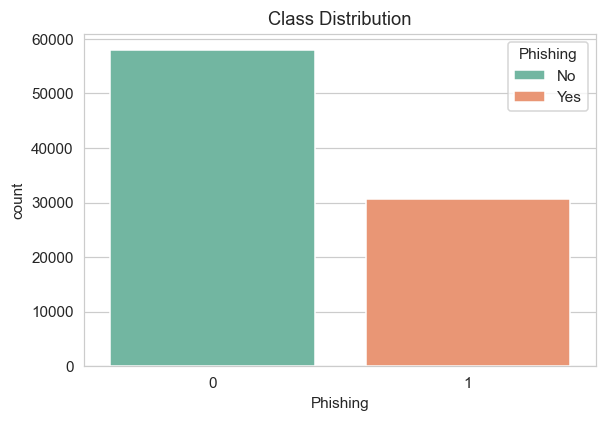

In [6]:
# class distribution
print(df['phishing'].value_counts())

# plot the class distribution
plt.figure(dpi=110)

chart = sns.countplot(x='phishing', data=df, hue='phishing', dodge=False, palette='Set2')

axes = chart.axes
axes.set_title('Class Distribution')
axes.set_xlabel('Phishing')
axes.legend(['No', 'Yes'], title='Phishing')

plt.show()

In [7]:
# handle duplicate datapoints
print("No of duplicate columns: ",df.duplicated(keep='first').sum())

# drop duplicate rows
df.drop_duplicates(inplace=True)

# shape after dropping duplicates
df.shape

No of duplicate columns:  1438


(87209, 112)

In [8]:
# handle columns with single value
# 0 variance => no information
single_val_cols = []

# for all columns
for i in df.columns:
    # columns with only 1 unique value
    if df[i].nunique()==1:
        single_val_cols.append(i)
        
# print all single value columns
display(single_val_cols)
        
# drop single value columns
df.drop(single_val_cols, axis=1, inplace =True)

# shape after dropping single value columns
df.shape

['qty_slash_domain',
 'qty_questionmark_domain',
 'qty_equal_domain',
 'qty_and_domain',
 'qty_exclamation_domain',
 'qty_space_domain',
 'qty_tilde_domain',
 'qty_comma_domain',
 'qty_plus_domain',
 'qty_asterisk_domain',
 'qty_hashtag_domain',
 'qty_dollar_domain',
 'qty_percent_domain']

(87209, 99)

In [9]:
# columns with invalid(-1) values
# proportion of -1 in such columns
cols_with_neg_1 = {} 

for i in df.columns:
    x = df[i].value_counts(normalize=True)
    if df[i].isin([-1]).any():
        cols_with_neg_1[i] = x[-1]

# -1 can be replaced with NaN and imputed using mean or knn imputer    
# print the columns with -1 along with the proportion
cols_with_neg_1

{'qty_dot_directory': 0.5311722413971035,
 'qty_hyphen_directory': 0.5311722413971035,
 'qty_underline_directory': 0.5311722413971035,
 'qty_slash_directory': 0.5311722413971035,
 'qty_questionmark_directory': 0.5311722413971035,
 'qty_equal_directory': 0.5311722413971035,
 'qty_at_directory': 0.5311722413971035,
 'qty_and_directory': 0.5311722413971035,
 'qty_exclamation_directory': 0.5311722413971035,
 'qty_space_directory': 0.5311722413971035,
 'qty_tilde_directory': 0.5311722413971035,
 'qty_comma_directory': 0.5311722413971035,
 'qty_plus_directory': 0.5311722413971035,
 'qty_asterisk_directory': 0.5311722413971035,
 'qty_hashtag_directory': 0.5311722413971035,
 'qty_dollar_directory': 0.5311722413971035,
 'qty_percent_directory': 0.5311722413971035,
 'directory_length': 0.5311722413971035,
 'qty_dot_file': 0.5311722413971035,
 'qty_hyphen_file': 0.5311722413971035,
 'qty_underline_file': 0.5311722413971035,
 'qty_slash_file': 0.5311722413971035,
 'qty_questionmark_file': 0.531172

In [10]:
# drop columns with more than 90% -1 values
# shape before dropping columns
display(df.shape)

for column_name, proportion in cols_with_neg_1.items():
    if proportion >= 0.9:
        df.drop(column_name, inplace=True, axis=1)
        
# shape after dropping columns
display(df.shape)

(87209, 99)

(87209, 79)

In [11]:
# group features for correlation analysis

# list all columns
print(df.columns)

# url based features
url_cols=['qty_dot_url', 'qty_hyphen_url', 'qty_underline_url', 'qty_slash_url','qty_questionmark_url', 
          'qty_equal_url', 'qty_at_url', 'qty_and_url','qty_exclamation_url', 'qty_space_url', 'qty_tilde_url',
          'qty_comma_url', 'qty_plus_url', 'qty_asterisk_url', 'qty_hashtag_url',
       'qty_dollar_url', 'qty_percent_url', 'qty_tld_url', 'length_url','email_in_url','phishing']

# domain based features
domain_cols=['qty_dot_domain', 'qty_hyphen_domain', 'qty_underline_domain',
       'qty_at_domain', 'qty_vowels_domain', 'domain_length', 'domain_in_ip','server_client_domain','phishing']

# directory based features
dir_cols=['qty_dot_directory', 'qty_hyphen_directory',
       'qty_underline_directory', 'qty_slash_directory',
       'qty_questionmark_directory', 'qty_equal_directory', 'qty_at_directory',
       'qty_and_directory', 'qty_exclamation_directory', 'qty_space_directory',
       'qty_tilde_directory', 'qty_comma_directory', 'qty_plus_directory',
       'qty_asterisk_directory', 'qty_hashtag_directory',
       'qty_dollar_directory', 'qty_percent_directory', 'directory_length','phishing']

# file based features
file_cols=['qty_dot_file', 'qty_hyphen_file', 'qty_underline_file',
       'qty_slash_file', 'qty_questionmark_file', 'qty_equal_file',
       'qty_at_file', 'qty_and_file', 'qty_exclamation_file', 'qty_space_file',
       'qty_tilde_file', 'qty_comma_file', 'qty_plus_file',
       'qty_asterisk_file', 'qty_hashtag_file', 'qty_dollar_file',
       'qty_percent_file', 'file_length','phishing']

# other features
other_cols=[ 'time_response','domain_spf', 'asn_ip', 'time_domain_activation',
       'time_domain_expiration', 'qty_ip_resolved', 'qty_nameservers',
       'qty_mx_servers', 'ttl_hostname', 'tls_ssl_certificate',
       'qty_redirects', 'url_google_index', 'domain_google_index',
       'url_shortened','phishing']

Index(['qty_dot_url', 'qty_hyphen_url', 'qty_underline_url', 'qty_slash_url',
       'qty_questionmark_url', 'qty_equal_url', 'qty_at_url', 'qty_and_url',
       'qty_exclamation_url', 'qty_space_url', 'qty_tilde_url',
       'qty_comma_url', 'qty_plus_url', 'qty_asterisk_url', 'qty_hashtag_url',
       'qty_dollar_url', 'qty_percent_url', 'qty_tld_url', 'length_url',
       'qty_dot_domain', 'qty_hyphen_domain', 'qty_underline_domain',
       'qty_at_domain', 'qty_vowels_domain', 'domain_length', 'domain_in_ip',
       'server_client_domain', 'qty_dot_directory', 'qty_hyphen_directory',
       'qty_underline_directory', 'qty_slash_directory',
       'qty_questionmark_directory', 'qty_equal_directory', 'qty_at_directory',
       'qty_and_directory', 'qty_exclamation_directory', 'qty_space_directory',
       'qty_tilde_directory', 'qty_comma_directory', 'qty_plus_directory',
       'qty_asterisk_directory', 'qty_hashtag_directory',
       'qty_dollar_directory', 'qty_percent_directory',

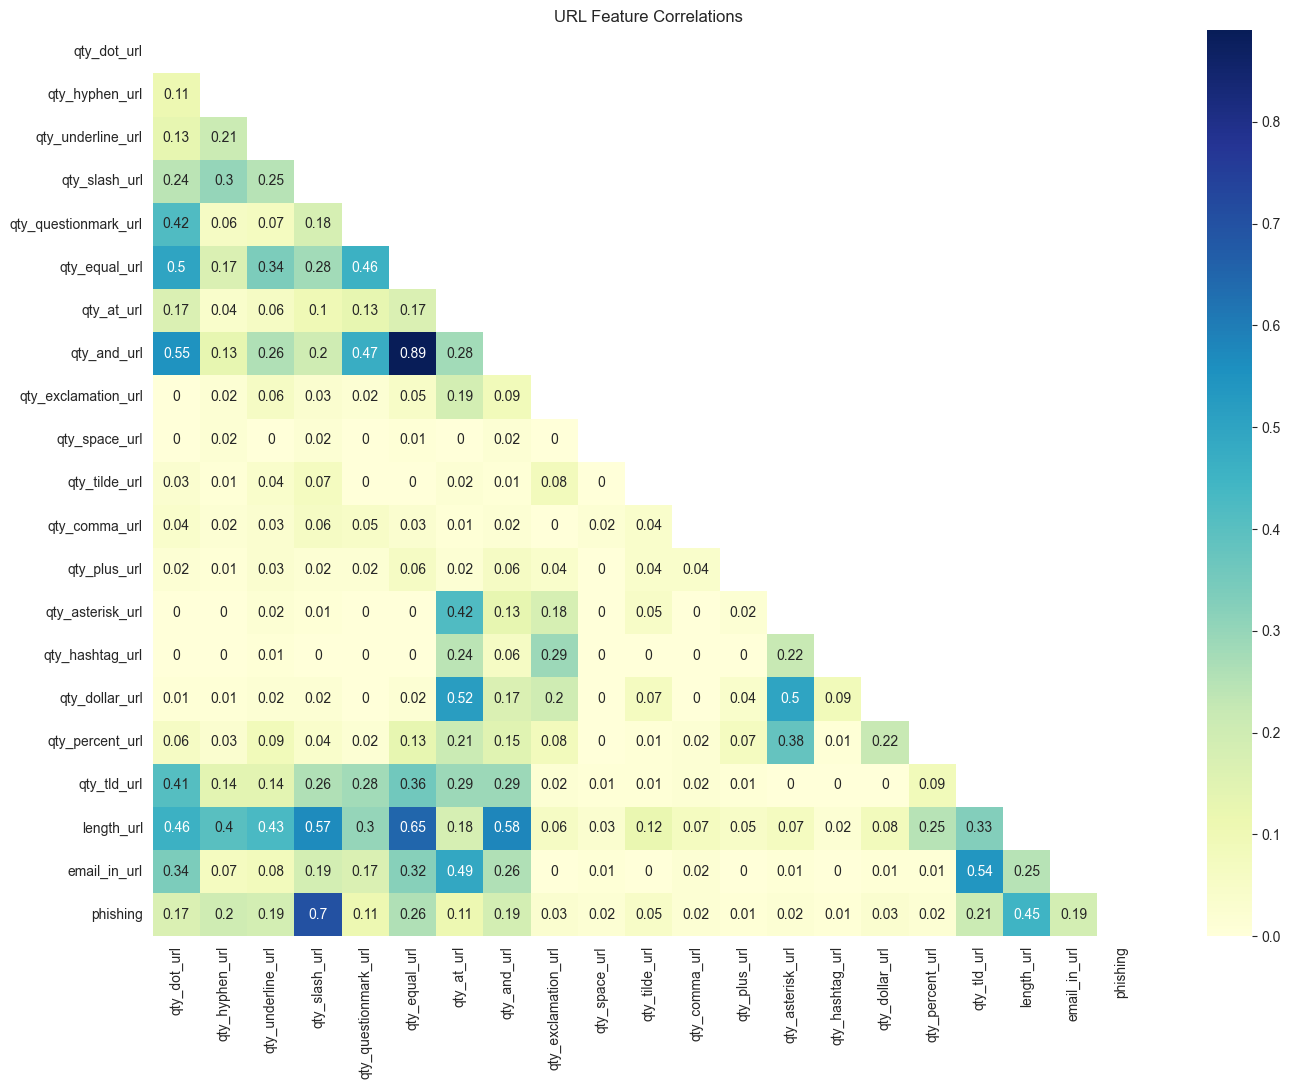

In [12]:
# correlation between features of url columns group
df_corr = df[url_cols].corr().round(2)

# mask for heatmap
mask = np.zeros_like(df_corr)
mask[np.triu_indices_from(mask)] = True

# plot feature correlations
plt.figure(figsize=(16,12), dpi=100)
sns.heatmap(df_corr.abs(), annot=True, cmap="YlGnBu", mask=mask)
plt.title('URL Feature Correlations')
plt.show()

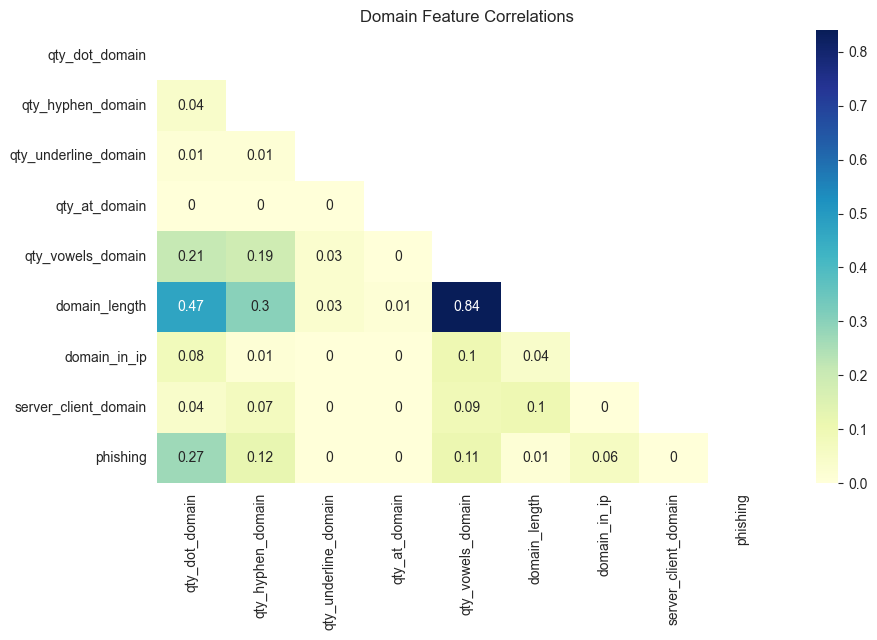

In [13]:
# correlation between features of domain columns group
df_corr = df[domain_cols].corr().round(2)

# mask for heatmap
mask = np.zeros_like(df_corr)
mask[np.triu_indices_from(mask)] = True

# plot feature correlations
plt.figure(figsize=(10,6), dpi=100)
sns.heatmap(df_corr.abs(), annot=True, cmap="YlGnBu", mask=mask)
plt.title('Domain Feature Correlations')
plt.show()

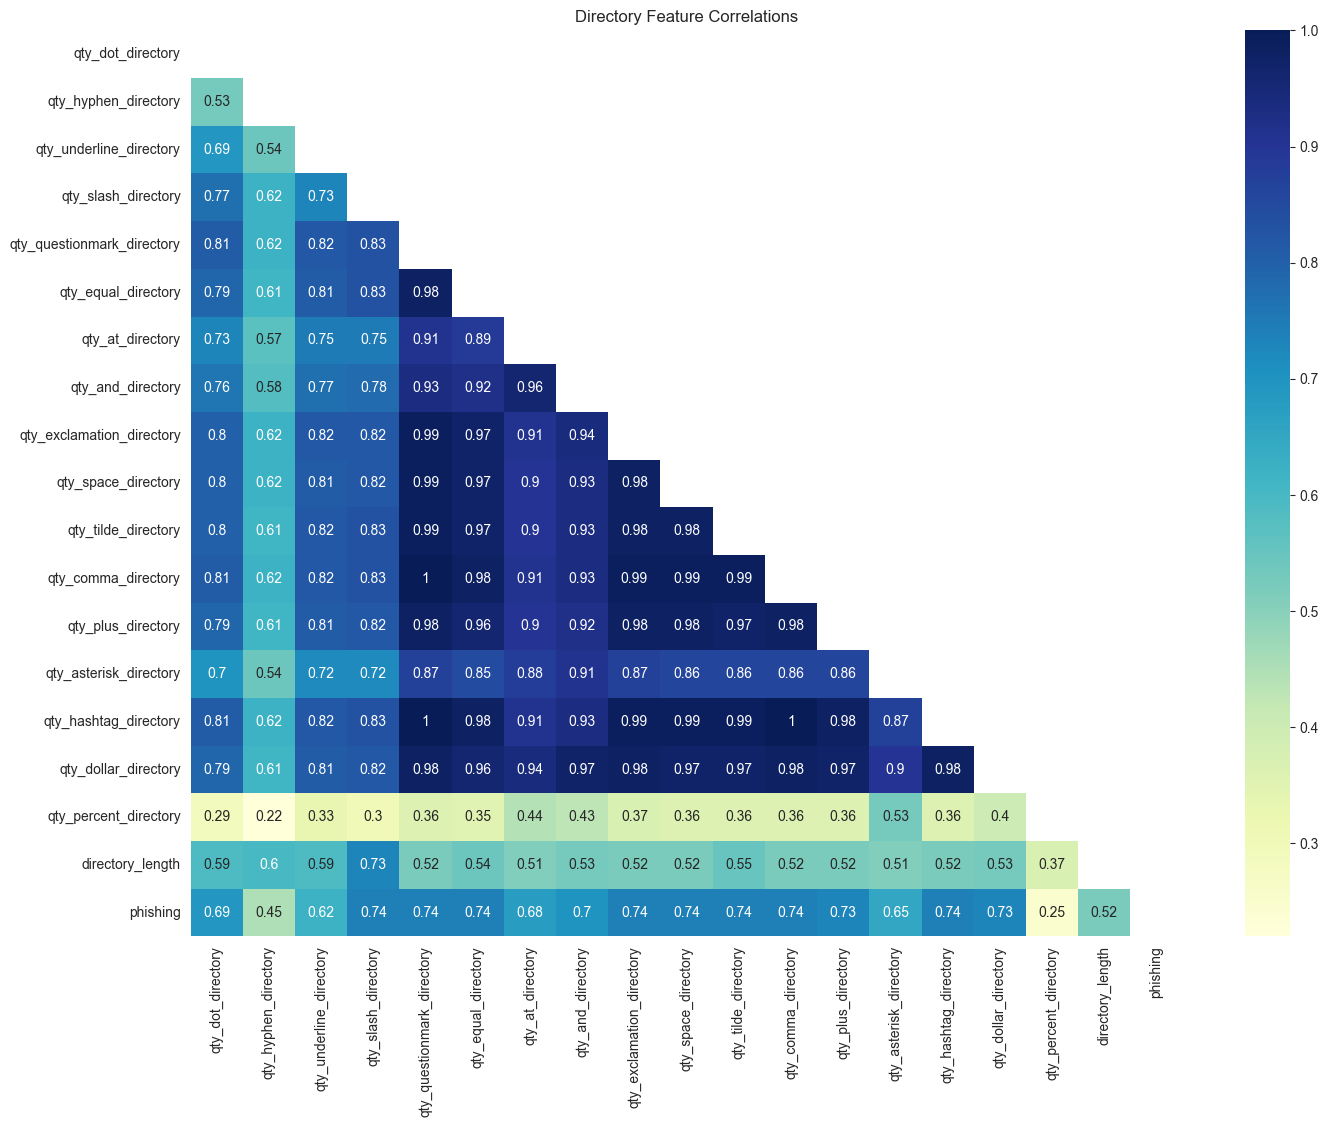

In [14]:
# correlation between features of directory columns group
df_corr = df[dir_cols].corr().round(2)

# mask for heatmap
mask = np.zeros_like(df_corr)
mask[np.triu_indices_from(mask)] = True

# plot feature correlations
plt.figure(figsize=(16,12), dpi=100)
sns.heatmap(df_corr.abs(), annot=True, cmap="YlGnBu", mask=mask)
plt.title('Directory Feature Correlations')
plt.show()

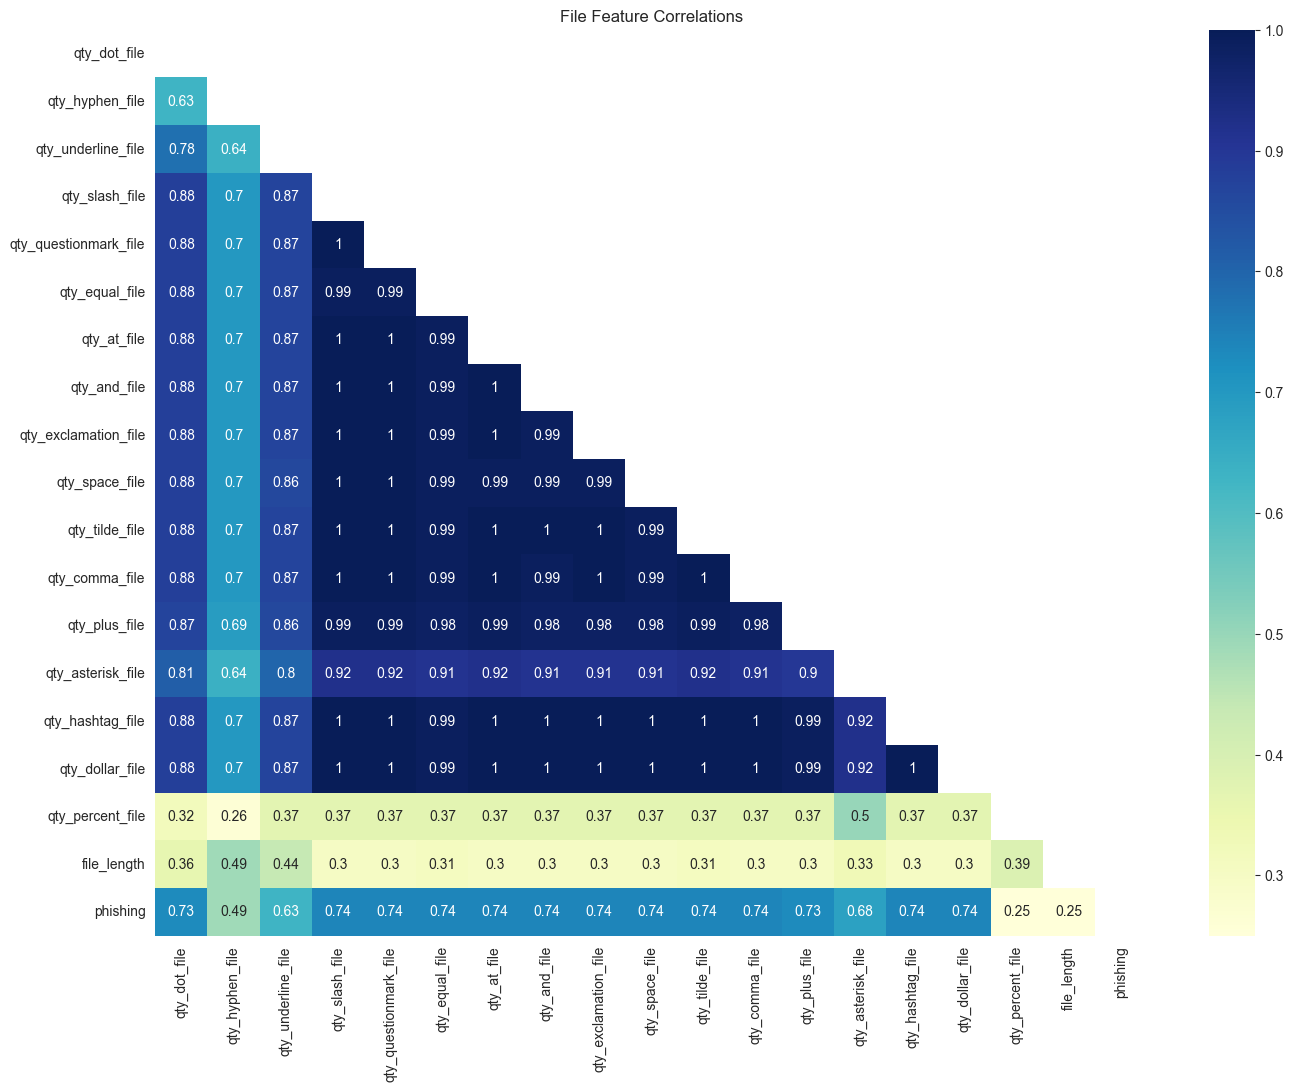

In [15]:
# correlation between features of file columns group
df_corr = df[file_cols].corr().round(2)

# mask for heatmap
mask = np.zeros_like(df_corr)
mask[np.triu_indices_from(mask)] = True

# plot feature correlations
plt.figure(figsize=(16,12), dpi=100)
sns.heatmap(df_corr.abs(), annot=True, cmap="YlGnBu", mask=mask)
plt.title('File Feature Correlations')
plt.show()

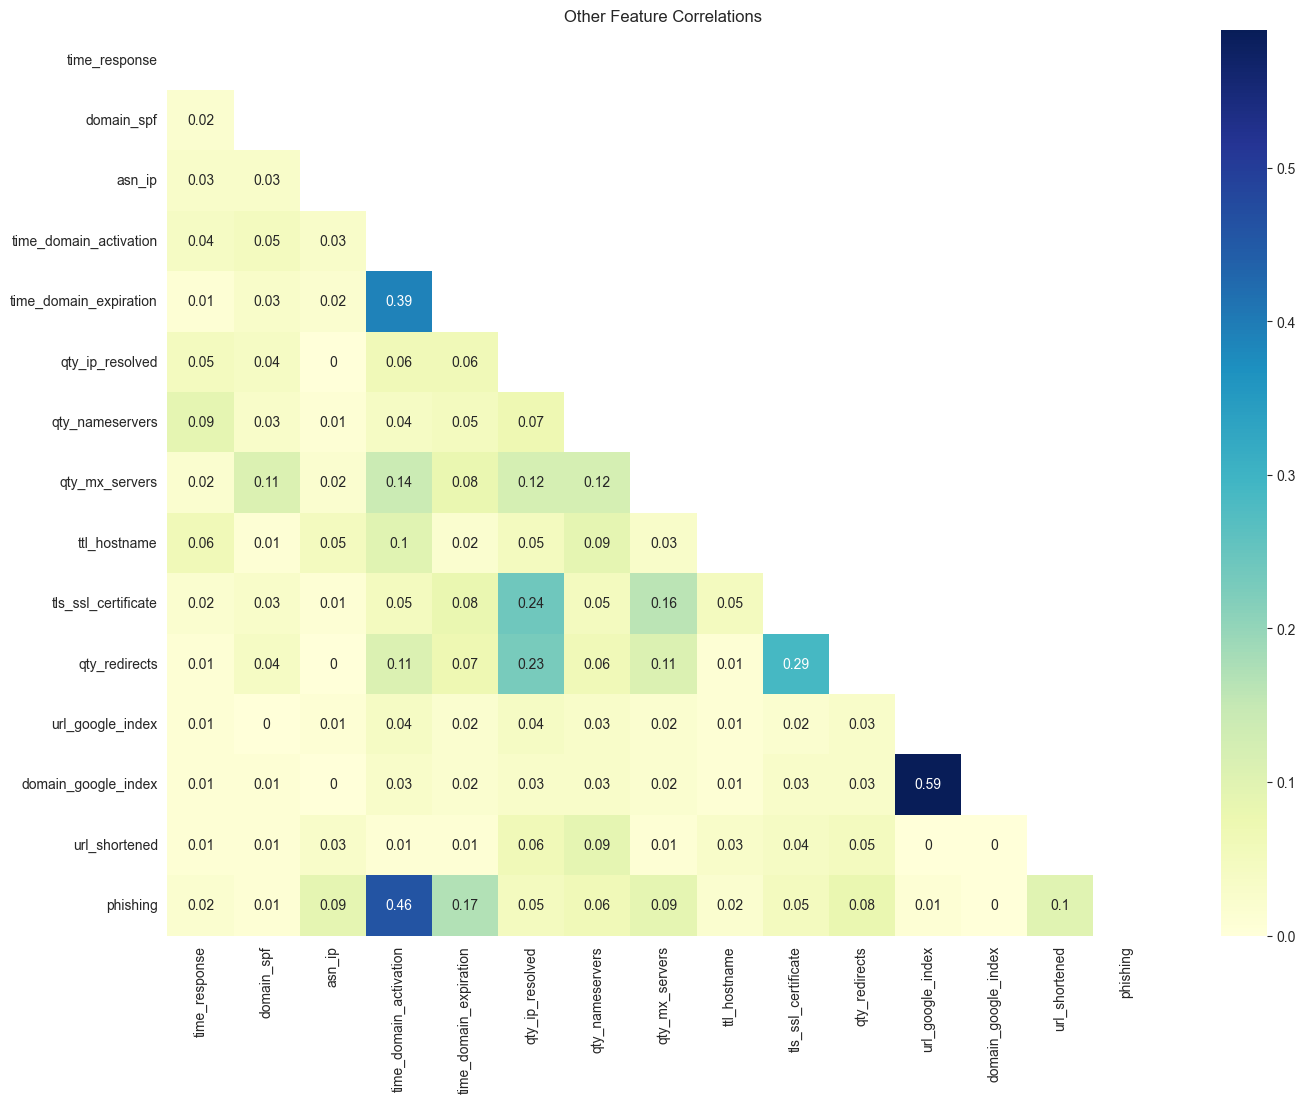

In [16]:
# correlation between features of other columns group
df_corr = df[other_cols].corr().round(2)

# mask for heatmap
mask = np.zeros_like(df_corr)
mask[np.triu_indices_from(mask)] = True

# plot feature correlations
plt.figure(figsize=(16,12), dpi=100)
sns.heatmap(df_corr.abs(), annot=True, cmap="YlGnBu", mask=mask)
plt.title('Other Feature Correlations')
plt.show()

# Milestone 2
----

In [17]:
# columns with proportion of -1 >= 90% have been dropped
# extract remaining columns with -1 values
# proportion of -1 < 90%
cols_with_neg_1 = {} 

for i in df.columns:
    x = df[i].value_counts(normalize=True)
    if df[i].isin([-1]).any():
        cols_with_neg_1[i] = x[-1]

# list the columns with -1 along with the proportion
display(cols_with_neg_1)

{'qty_dot_directory': 0.5311722413971035,
 'qty_hyphen_directory': 0.5311722413971035,
 'qty_underline_directory': 0.5311722413971035,
 'qty_slash_directory': 0.5311722413971035,
 'qty_questionmark_directory': 0.5311722413971035,
 'qty_equal_directory': 0.5311722413971035,
 'qty_at_directory': 0.5311722413971035,
 'qty_and_directory': 0.5311722413971035,
 'qty_exclamation_directory': 0.5311722413971035,
 'qty_space_directory': 0.5311722413971035,
 'qty_tilde_directory': 0.5311722413971035,
 'qty_comma_directory': 0.5311722413971035,
 'qty_plus_directory': 0.5311722413971035,
 'qty_asterisk_directory': 0.5311722413971035,
 'qty_hashtag_directory': 0.5311722413971035,
 'qty_dollar_directory': 0.5311722413971035,
 'qty_percent_directory': 0.5311722413971035,
 'directory_length': 0.5311722413971035,
 'qty_dot_file': 0.5311722413971035,
 'qty_hyphen_file': 0.5311722413971035,
 'qty_underline_file': 0.5311722413971035,
 'qty_slash_file': 0.5311722413971035,
 'qty_questionmark_file': 0.531172

In [18]:
# replace -1 vaues with NaN
df = df.replace(to_replace = -1, value=np.nan)

# show columns with null(NaN) counts
df[list(cols_with_neg_1.keys())].isna().sum()

qty_dot_directory             46323
qty_hyphen_directory          46323
qty_underline_directory       46323
qty_slash_directory           46323
qty_questionmark_directory    46323
qty_equal_directory           46323
qty_at_directory              46323
qty_and_directory             46323
qty_exclamation_directory     46323
qty_space_directory           46323
qty_tilde_directory           46323
qty_comma_directory           46323
qty_plus_directory            46323
qty_asterisk_directory        46323
qty_hashtag_directory         46323
qty_dollar_directory          46323
qty_percent_directory         46323
directory_length              46323
qty_dot_file                  46323
qty_hyphen_file               46323
qty_underline_file            46323
qty_slash_file                46323
qty_questionmark_file         46323
qty_equal_file                46323
qty_at_file                   46323
qty_and_file                  46323
qty_exclamation_file          46323
qty_space_file              

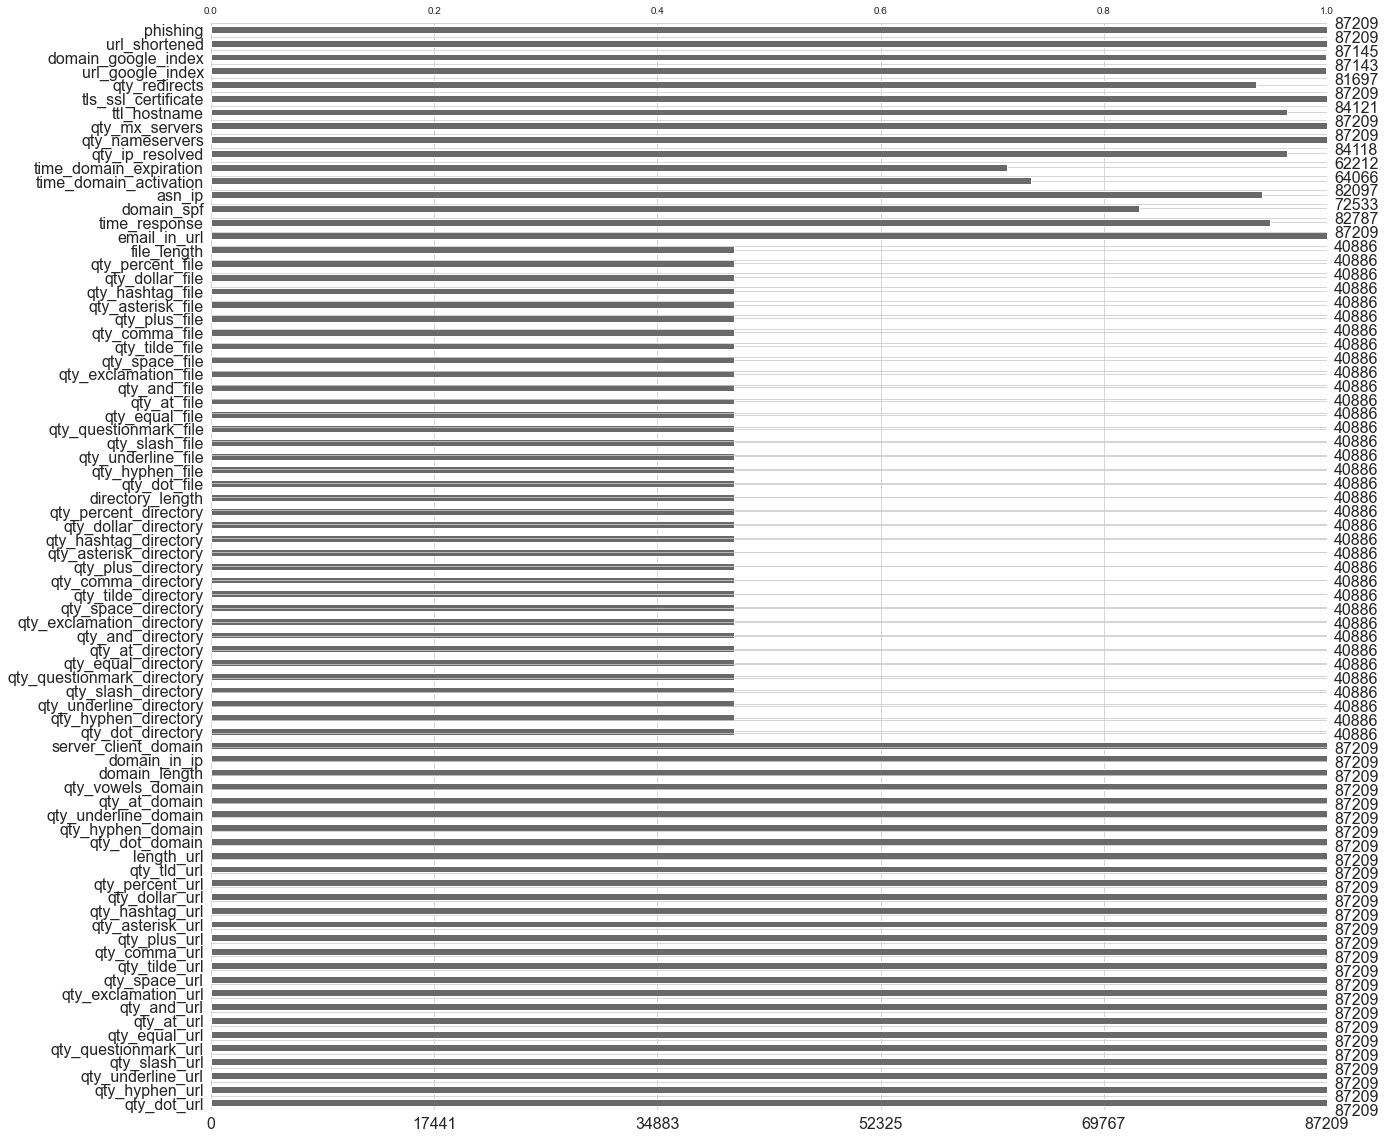

In [19]:
# plot missing numbers using bar plot
# the bar represents the number of non-null values
msno.bar(df, figsize=(20,20))
plt.show()

In [20]:
# drop all null value rows for feature selection
# shape before dropping rows with null values
display(df.shape)

df_no_null_features = df.dropna(axis=0)

# shape after dropping rows with null values
display(df_no_null_features.shape)

# separate independent and dependent features
x = df_no_null_features.drop('phishing', axis=1)
y = df_no_null_features['phishing']

(87209, 79)

(18070, 79)

In [21]:
# feature importance analysis using XGBoost
# instantiate an XGBoost model
model = XGBClassifier(n_estimators=100)

# training start
print('training XGBoost...')
start_time = time.time()

# train the model
model.fit(x, y)

# training end
end_time = time.time()
print('training completed:', '{:.2f}'.format(end_time - start_time), 'seconds')

training XGBoost...
training completed: 2.71 seconds


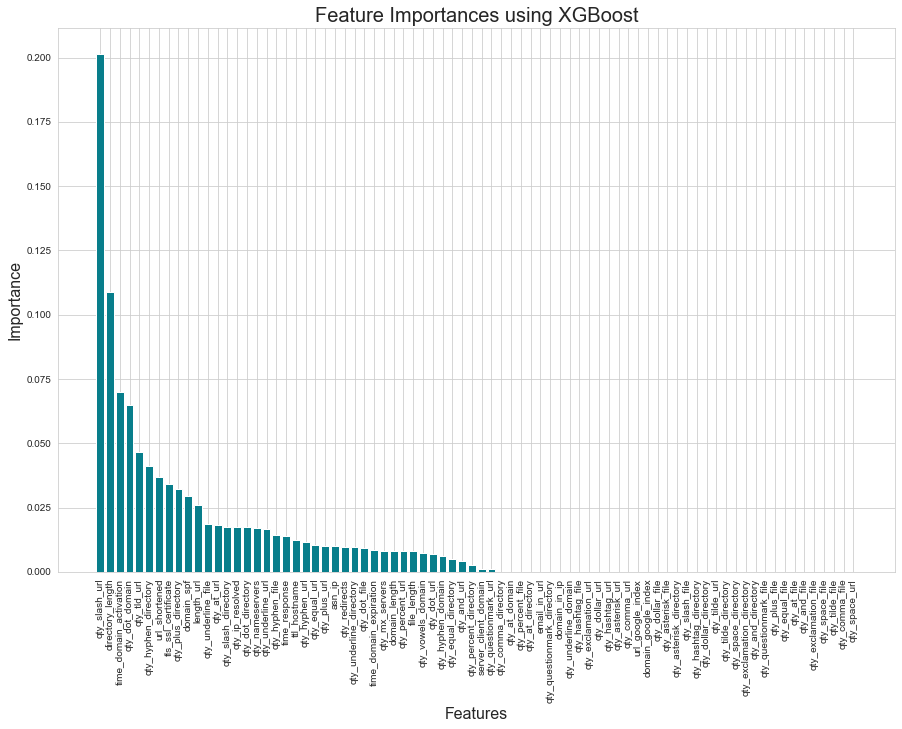

In [22]:
# create a mapping of features and feature importance
imp_features_xgb = pd.DataFrame(
    {
        'features': x.columns,
        'importance': model.feature_importances_
    }
)

# sort the features by their feature importance in descending order
imp_features_xgb = imp_features_xgb.sort_values(by='importance', ascending=False)

# plot the feature importance
plt.figure(figsize=(15,10))

plt.bar(x=imp_features_xgb['features'], height=imp_features_xgb['importance'], color='#087E8B')

plt.title('Feature Importances using XGBoost', size=20)
plt.xlabel('Features', size=16)
plt.ylabel('Importance', size=16)
plt.xticks(rotation='vertical')

plt.show()

In [23]:
# important features with XGBoost
# extract the features with importance greater than 0
imp_features_xgb = [feat for feat,imp in zip(imp_features_xgb['features'], imp_features_xgb['importance']) if imp>0]

# list all such important features
display(imp_features_xgb)

# number of important features
len(imp_features_xgb)

['qty_slash_url',
 'directory_length',
 'time_domain_activation',
 'qty_dot_domain',
 'qty_tld_url',
 'qty_hyphen_directory',
 'url_shortened',
 'tls_ssl_certificate',
 'qty_plus_directory',
 'domain_spf',
 'length_url',
 'qty_underline_file',
 'qty_at_url',
 'qty_slash_directory',
 'qty_ip_resolved',
 'qty_dot_directory',
 'qty_nameservers',
 'qty_underline_url',
 'qty_hyphen_file',
 'time_response',
 'ttl_hostname',
 'qty_hyphen_url',
 'qty_equal_url',
 'qty_plus_url',
 'asn_ip',
 'qty_redirects',
 'qty_underline_directory',
 'qty_dot_file',
 'time_domain_expiration',
 'qty_mx_servers',
 'domain_length',
 'qty_percent_url',
 'file_length',
 'qty_vowels_domain',
 'qty_dot_url',
 'qty_hyphen_domain',
 'qty_equal_directory',
 'qty_and_url',
 'qty_percent_directory',
 'server_client_domain',
 'qty_questionmark_url']

41

In [24]:
# feature importance analysis using Logistic Regression
# instantiate an Logistic Regression model
model = LogisticRegression()

# training start
print('training Logistic Regression...')
start_time = time.time()

# train the model
model.fit(x, y)

# training end
end_time = time.time()
print('training end:', '{:.2f}'.format(end_time - start_time), 'seconds elapsed!')

training Logistic Regression...
training end: 0.37 seconds elapsed!


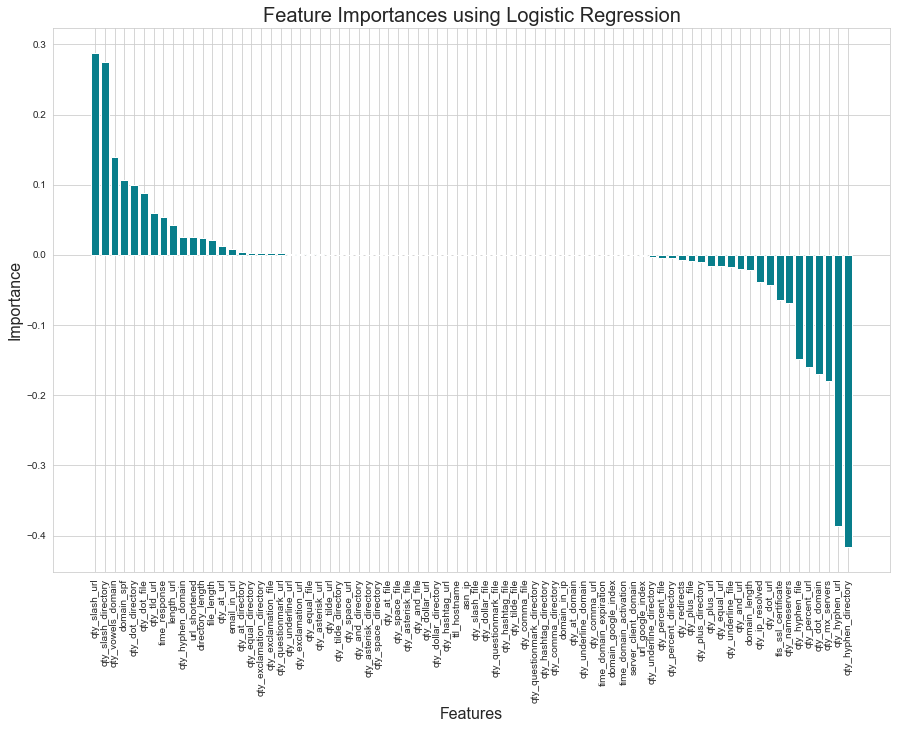

In [25]:
# create a mapping of features and feature importance
imp_features_lr = pd.DataFrame(
    {
        'features': x.columns,
        'importance': model.coef_[0]
    }
)

# sort the features by their feature importance in descending order
imp_features_lr = imp_features_lr.sort_values(by='importance', ascending=False)

# plot the feature importance
plt.figure(figsize=(15,10))

plt.bar(x=imp_features_lr['features'], height=imp_features_lr['importance'], color='#087E8B')

plt.title('Feature Importances using Logistic Regression', size=20)
plt.xlabel('Features', size=16)
plt.ylabel('Importance', size=16)
plt.xticks(rotation='vertical')

plt.show()

In [26]:
# important features with Logistic Regression
# extract the features with absolute value of importance greater than 0
imp_features_lr = [feat for feat,imp in zip(imp_features_lr['features'], imp_features_lr['importance']) if abs(imp)>0]

# list all such important features
display(imp_features_lr)

# number of important features
len(imp_features_lr)

['qty_slash_url',
 'qty_slash_directory',
 'qty_vowels_domain',
 'domain_spf',
 'qty_dot_directory',
 'qty_dot_file',
 'qty_tld_url',
 'time_response',
 'length_url',
 'qty_hyphen_domain',
 'url_shortened',
 'directory_length',
 'file_length',
 'qty_at_url',
 'email_in_url',
 'qty_at_directory',
 'qty_equal_directory',
 'qty_exclamation_directory',
 'qty_exclamation_file',
 'qty_questionmark_url',
 'qty_underline_url',
 'qty_exclamation_url',
 'qty_equal_file',
 'qty_asterisk_url',
 'qty_tilde_url',
 'qty_tilde_directory',
 'qty_space_url',
 'qty_and_directory',
 'qty_asterisk_directory',
 'qty_space_directory',
 'qty_at_file',
 'qty_space_file',
 'qty_asterisk_file',
 'qty_and_file',
 'qty_dollar_url',
 'qty_dollar_directory',
 'qty_hashtag_url',
 'ttl_hostname',
 'asn_ip',
 'time_domain_expiration',
 'domain_google_index',
 'time_domain_activation',
 'server_client_domain',
 'url_google_index',
 'qty_underline_directory',
 'qty_percent_file',
 'qty_percent_directory',
 'qty_redirects

65

In [29]:
# analysis of feature importance with XGBoost vs Logistic Regression
# common important features
common_features = list(set(imp_features_xgb).intersection(imp_features_lr))
print('total common features:', len(common_features))

# important features exclusive to XGBoost
xgb_only_features = list(set(imp_features_xgb).difference(imp_features_lr))
print('only xgboost features:', len(xgb_only_features))

# important features exclusive to Logistic Regression
lr_only_features = list(set(imp_features_lr).difference(imp_features_xgb))
print('only log-reg features:', len(lr_only_features))

# union of important features
important_features_all = list(set(imp_features_xgb).union(imp_features_lr))
important_features_all.append('phishing')
print('all important features:', len(important_features_all))

# useless features
useless_features = list(set(df.columns).difference(important_features_all))
print('not important features:', len(useless_features))

total common features: 41
only xgboost features: 0
only log-reg features: 24
all important features: 66
not important features: 13


In [30]:
# update dataset to drop not important features
# shape before dropping useless features
display(df.shape)

# drop 13 columns
df = df.drop(columns=useless_features, axis=1)

# reset index
df = df.reset_index(drop=True)

# shape after dropping useless features
df.shape

(87209, 79)

(87209, 66)